In [1]:
import pandas as pd
import numpy as np
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ratings dataset
ratings = pd.read_csv("data/ml-100k/u.data", sep="\t", names=["userId", "movieId", "rating", "timestamp"])

# Movies dataset
movies = pd.read_csv("data/ml-100k/u.item", sep="|", encoding="latin-1",
                     names=["movieId", "title", "release_date", "video_release_date", "IMDb_URL",
                            "unknown","Action","Adventure","Animation","Children's","Comedy","Crime",
                            "Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery",
                            "Romance","Sci-Fi","Thriller","War","Western"])
# Fill missing values (as done before)
movies['release_date'] = movies['release_date'].fillna('unknown')
movies['IMDb_URL'] = movies['IMDb_URL'].fillna('unknown')


In [5]:
import pandas as pd

# Load top 10 recommendations
top_10_user1 = pd.read_csv("ml/top_10_recommendations_user1.csv")

# Preview
print(top_10_user1)

   movieId                                   title  predicted_rating
0       50                        Star Wars (1977)          0.564475
1      174          Raiders of the Lost Ark (1981)          0.392052
2      127                   Godfather, The (1972)          0.387986
3      172         Empire Strikes Back, The (1980)          0.348122
4       12              Usual Suspects, The (1995)          0.331018
5      173              Princess Bride, The (1987)          0.325199
6      100                            Fargo (1996)          0.311497
7      168  Monty Python and the Holy Grail (1974)          0.295959
8       98        Silence of the Lambs, The (1991)          0.289811
9       56                     Pulp Fiction (1994)          0.286030


In [6]:
def recommend_movies(user_id, top_n=10):
    # Predicted ratings for this user
    user_ratings = pred_ratings_df[user_id]
    
    # Remove movies already rated by user
    rated_movies = ratings[ratings.userId == user_id]['movieId'].tolist()
    recommendations = user_ratings.drop(rated_movies)
    
    # Get top-N movies
    top_recommendations = recommendations.sort_values(ascending=False).head(top_n)
    
    # Merge with movie titles
    top_with_titles = pd.DataFrame(top_recommendations).reset_index()
    top_with_titles.columns = ['movieId', 'predicted_rating']
    top_with_titles = top_with_titles.merge(movies[['movieId','title']], on='movieId', how='left')
    
    return top_with_titles

In [8]:
import pandas as pd

# Load top 10 recommendations from CSV
top_movies = pd.read_csv("ml/top_10_recommendations_user1.csv")

print(f"Top 10 recommended movies for user 1:\n")
print(top_movies)


Top 10 recommended movies for user 1:

   movieId                                   title  predicted_rating
0       50                        Star Wars (1977)          0.564475
1      174          Raiders of the Lost Ark (1981)          0.392052
2      127                   Godfather, The (1972)          0.387986
3      172         Empire Strikes Back, The (1980)          0.348122
4       12              Usual Suspects, The (1995)          0.331018
5      173              Princess Bride, The (1987)          0.325199
6      100                            Fargo (1996)          0.311497
7      168  Monty Python and the Holy Grail (1974)          0.295959
8       98        Silence of the Lambs, The (1991)          0.289811
9       56                     Pulp Fiction (1994)          0.286030


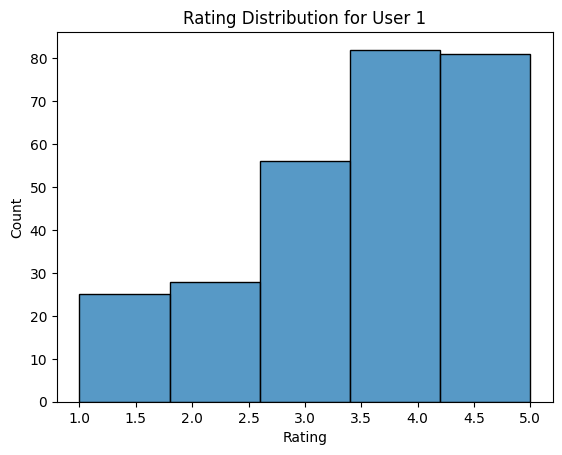

In [9]:
user_rated = ratings[ratings.userId == user_id]
sns.histplot(user_rated['rating'], bins=5, kde=False)
plt.title(f"Rating Distribution for User {user_id}")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

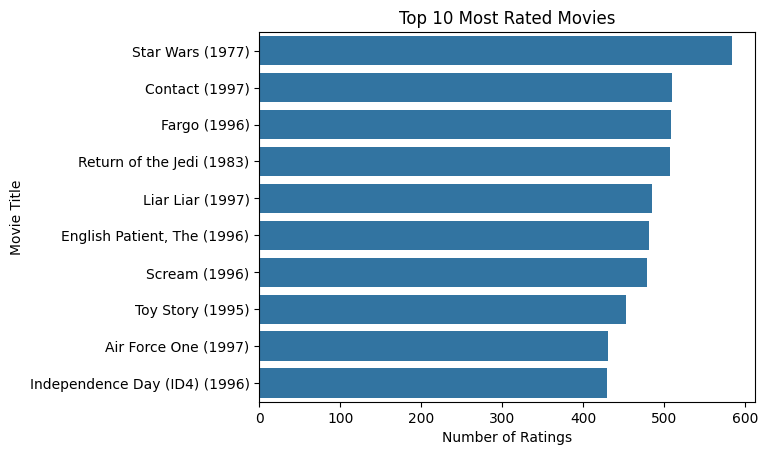

In [10]:
movie_counts = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
movie_counts = movie_counts.reset_index().merge(movies[['movieId','title']], on='movieId')
sns.barplot(x='rating', y='title', data=movie_counts)
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.show()